In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from sklearn.utils.class_weight import compute_class_weight

In [3]:
real_path = './image_dataset/Dataset/Test/Real'
fake_path = './image_dataset/Dataset/Test/Fake'

def load_image_paths_labels(folder_path, label):
    image_paths = []
    labels = []
    for file in os.listdir(folder_path):
        image_paths.append(os.path.join(folder_path, file))
        labels.append(label)

    return image_paths, labels

In [5]:
dataset_path = './dataset'
for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./dataset\real_and_fake_face\training_fake\easy_100_1111.jpg
./dataset\real_and_fake_face\training_fake\easy_101_0010.jpg
./dataset\real_and_fake_face\training_fake\easy_102_0101.jpg
./dataset\real_and_fake_face\training_fake\easy_103_1111.jpg
./dataset\real_and_fake_face\training_fake\easy_104_1000.jpg
./dataset\real_and_fake_face\training_fake\easy_105_1100.jpg
./dataset\real_and_fake_face\training_fake\easy_106_0011.jpg
./dataset\real_and_fake_face\training_fake\easy_107_1011.jpg
./dataset\real_and_fake_face\training_fake\easy_108_1111.jpg
./dataset\real_and_fake_face\training_fake\easy_109_1111.jpg
./dataset\real_and_fake_face\training_fake\easy_10_0001.jpg
./dataset\real_and_fake_face\training_fake\easy_110_0001.jpg
./dataset\real_and_fake_face\training_fake\easy_111_1101.jpg
./dataset\real_and_fake_face\training_fake\easy_112_1001.jpg
./dataset\real_and_fake_face\training_fake\easy_113_0011.jpg
./dataset\real_and_fake_face\training_fake\easy_114_1110.jpg
./dataset\real_and_fake_f

In [7]:
real_paths, real_labels = load_image_paths_labels(real_path, 1)
fake_paths, fake_labels = load_image_paths_labels(fake_path, 0)

image_paths = real_paths + fake_paths 
labels = real_labels + fake_labels

df = pd.DataFrame({'Paths': image_paths, 'Real':labels})

In [9]:
df.head()

,Paths,Real
0,./image_dataset/Dataset/Test/Real\real_0.jpg,1
1,./image_dataset/Dataset/Test/Real\real_1.jpg,1
2,./image_dataset/Dataset/Test/Real\real_10.jpg,1
3,./image_dataset/Dataset/Test/Real\real_100.jpg,1
4,./image_dataset/Dataset/Test/Real\real_1000.jpg,1


In [11]:
df.shape

(10905, 2)

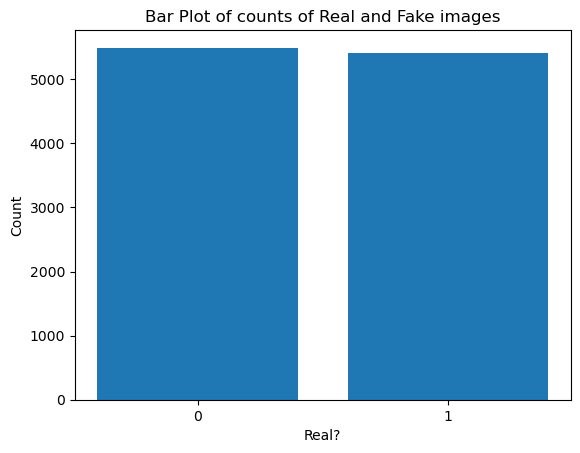

In [13]:
value_counts = df.value_counts('Real')
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Real?')
plt.ylabel('Count')
plt.title('Bar Plot of counts of Real and Fake images')
plt.xticks([0,1])
plt.show()

In [15]:
def preprocess_image(path, target_size=(128, 128), color_mode='rgb'):
    img = load_img(path, color_mode = color_mode, target_size=target_size)
    img_array = img_to_array(img)
    img_array = img_array/255.0
    return img_array

df['image'] = df['Paths'].apply(preprocess_image)

In [16]:
df.image[1]

array([[[0.78039217, 0.6156863 , 0.5686275 ],
        [0.8352941 , 0.67058825, 0.62352943],
        [0.8509804 , 0.6862745 , 0.6392157 ],
        ...,
        [0.39607844, 0.3137255 , 0.23137255],
        [0.34901962, 0.26666668, 0.18431373],
        [0.40784314, 0.3254902 , 0.24313726]],

       [[0.78039217, 0.60784316, 0.5647059 ],
        [0.8352941 , 0.6627451 , 0.61960787],
        [0.8862745 , 0.72156864, 0.6745098 ],
        ...,
        [0.38039216, 0.3019608 , 0.20784314],
        [0.35686275, 0.27450982, 0.19215687],
        [0.42352942, 0.34117648, 0.25882354]],

       [[0.8039216 , 0.6313726 , 0.5803922 ],
        [0.8745098 , 0.7019608 , 0.6509804 ],
        [0.9019608 , 0.7372549 , 0.68235296],
        ...,
        [0.38039216, 0.3019608 , 0.20784314],
        [0.35686275, 0.2784314 , 0.18431373],
        [0.39607844, 0.31764707, 0.22352941]],

       ...,

       [[0.21568628, 0.19215687, 0.23137255],
        [0.22352941, 0.2       , 0.23921569],
        [0.21960784, 0

### Splitting up our data for testing and training

In [26]:
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['Real'], random_state = 123)

X_train = np.stack(train_df['image'].values)
y_train = train_df['Real'].values
X_test = np.stack(test_df['image'].values)
y_test = test_df['Real'].values

### Model Building

In [ ]:
def model():
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(128, 128, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5)) 
    model.add(Dense(1, activation='sigmoid'))

    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [23]:
model1 = model()
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))
model1.summary()
history = model1.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weights_dict)

C:\Users\riyaj\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,483,265 (32.36 MB)

 Trainable params: 8,482,817 (32.36 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 278s 1s/step - accuracy: 0.5871 - loss: 0.8328 - val_accuracy: 0.6790 - val_loss: 0.6040
Epoch 2/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 238s 871ms/step - accuracy: 0.7136 - loss: 0.5445 - val_accuracy: 0.7075 - val_loss: 0.5414
Epoch 3/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 252s 923ms/step - accuracy: 0.7528 - loss: 0.4949 - val_accuracy: 0.7258 - val_loss: 0.5185
Epoch 4/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 224s 819ms/step - accuracy: 0.7944 - loss: 0.4237 - val_accuracy: 0.7492 - val_loss: 0.5001
Epoch 5/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 180s 659ms/step - accuracy: 0.8409 - loss: 0.3569 - val_accuracy: 0.7547 - val_loss: 0.5020
Epoch 6/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 179s 655ms/step - accuracy: 0.8671 - loss: 0.3007 - val_accuracy: 0.7689 - val_loss: 0.4838
Epoch 7/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 209s 766ms/step - accuracy: 0.9081 - loss: 0.2211 - val_accuracy: 0.7639 - val_loss: 0.5169
Epoch 8/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 193s 706ms/step - accuracy: 0.9282 - lo

### Ploting Accuracy and Loss

In [25]:
def eval(results, model):

    plt.subplot(211)
    plt.subplots_adjust(hspace=0.4)
    plt.title('Cross Entropy Loss')
    plt.plot(results.history['loss'], color='blue', label='train')
    plt.plot(results.history['val_loss'], color='orange', label='test')
    plt.legend()
    
    plt.subplot(212)
    plt.title('Accuracy')
    plt.plot(results.history['accuracy'], color='blue', label='train')
    plt.plot(results.history['val_accuracy'], color='orange', label='test')
    plt.xlabel('Epoch')
    plt.legend()
    
    loss, acc = model1.evaluate(X_test, y_test, verbose=0)
    print('Cross Entropy Loss: %.2f' % loss)
    print('Validation Accuracy: %.2f%%' % (acc * 100.0))

Cross Entropy Loss: 0.71
Validation Accuracy: 81.89%


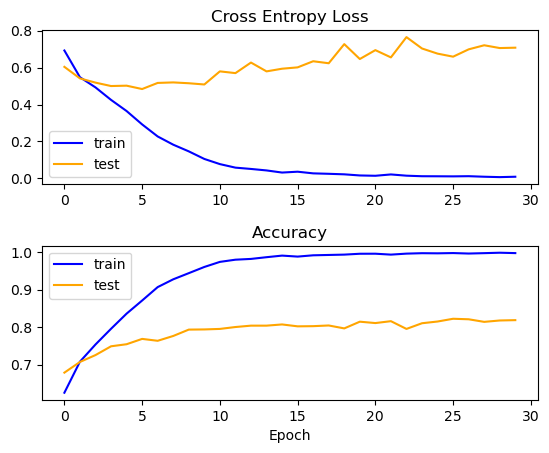

In [27]:
eval(history, model1)

In [29]:
predictions = model1.predict(X_test)

predicted_labels = np.round(predictions).flatten().astype(int)
true_labels = np.round(y_test).flatten().astype(int)

69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 161ms/step


In [31]:
predicted_labels

array([0, 1, 0, ..., 1, 1, 0])

In [33]:
true_labels

array([0, 1, 1, ..., 1, 1, 0])

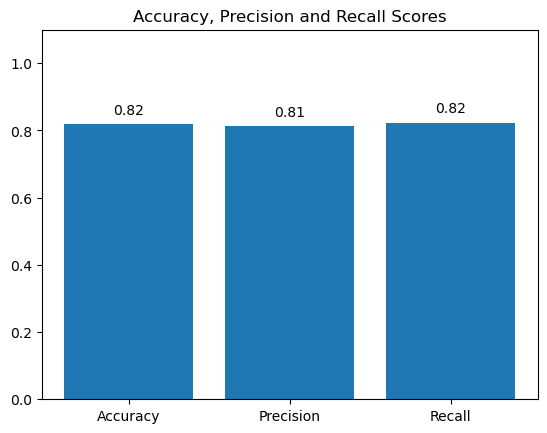

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score

accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)

metrics = ['Accuracy', 'Precision', 'Recall']
scores = [accuracy, precision, recall]


plt.bar(metrics, scores)

for i, score in enumerate(scores):
    plt.text(i, score+0.02, f'{score:.2f}', ha='center', va='bottom', fontsize = 10)
    
plt.ylim(0,1.1)
plt.title('Accuracy, Precision and Recall Scores')
plt.show()

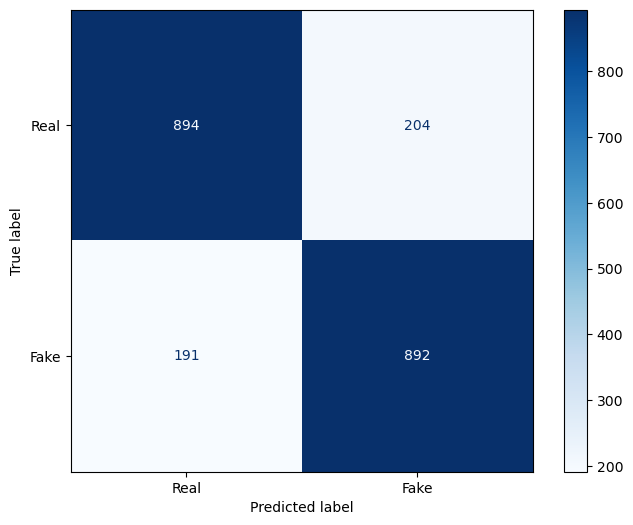

In [39]:
conf = confusion_matrix(true_labels, predicted_labels)
labels = ['Real', 'Fake']

conf_mat = ConfusionMatrixDisplay(conf, display_labels=labels)

fig, ax = plt.subplots(figsize=(8, 6))
conf_mat.plot(ax=ax, cmap=plt.cm.Blues, values_format='.0f') 
plt.show()

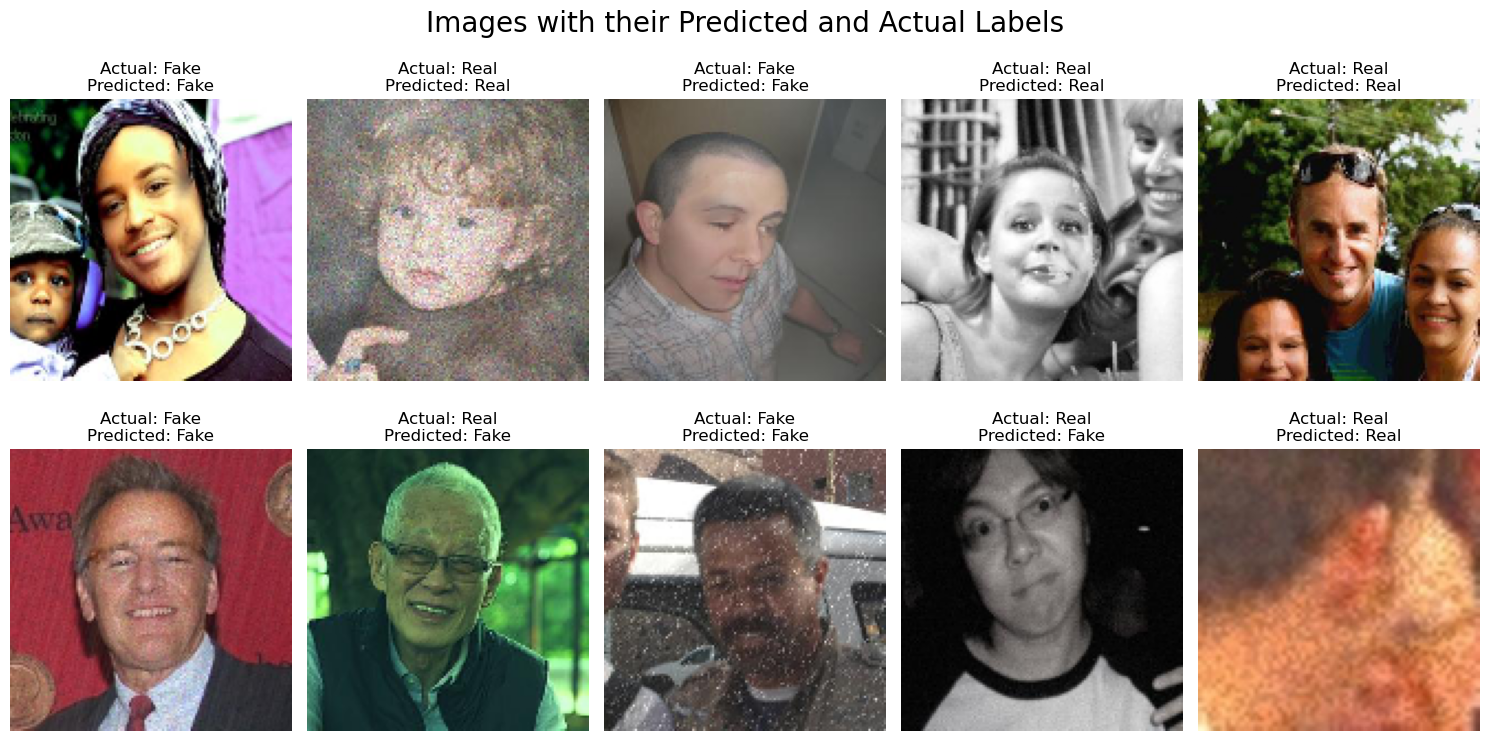

In [45]:
indices = np.random.choice(len(X_test), 10)

disp_img = X_test[indices]
disp_img_lab = y_test[indices]

fig, axes = plt.subplots(nrows=2, ncols = 5, figsize = (15,8))
fig.suptitle('Images with their Predicted and Actual Labels', fontsize=20)

for i, ax in enumerate(axes.flat):
    ax.imshow(disp_img[i])
    ax.axis('off')
    
    actual_label = 'Real' if disp_img_lab[i] == 1 else 'Fake'
    predicted_label = 'Real' if predicted_labels[i] == 1 else 'Fake'
    ax.set_title('Actual: ' +actual_label +'\n' + 'Predicted: ' + predicted_label)
    
plt.tight_layout()
plt.show()

In [47]:
model1.save('deepfake_model3.h5')

### Improving Model

In [28]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20, 
    width_shift_range=0.2,
    height_shift_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True
)

In [30]:
def model_new():
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(128, 128, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5)) 
    model.add(Dense(1, activation='sigmoid'))

    opt = SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [32]:
model2 = model_new()
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))
model2.summary()
history = model2.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weights_dict)

C:\Users\riyaj\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,483,265 (32.36 MB)

 Trainable params: 8,482,817 (32.36 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 391s 1s/step - accuracy: 0.5942 - loss: 0.8761 - val_accuracy: 0.6667 - val_loss: 0.6108
Epoch 2/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 386s 1s/step - accuracy: 0.7187 - loss: 0.5388 - val_accuracy: 0.7148 - val_loss: 0.5444
Epoch 3/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 375s 1s/step - accuracy: 0.7500 - loss: 0.5005 - val_accuracy: 0.7295 - val_loss: 0.5293
Epoch 4/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 365s 1s/step - accuracy: 0.8115 - loss: 0.4088 - val_accuracy: 0.7460 - val_loss: 0.4972
Epoch 5/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 409s 2s/step - accuracy: 0.8493 - loss: 0.3440 - val_accuracy: 0.7643 - val_loss: 0.4792
Epoch 6/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 374s 1s/step - accuracy: 0.8951 - loss: 0.2612 - val_accuracy: 0.7607 - val_loss: 0.5088
Epoch 7/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 381s 1s/step - accuracy: 0.9118 - loss: 0.2163 - val_accuracy: 0.7859 - val_loss: 0.4692
Epoch 8/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 910s 3s/step - accuracy: 0.9399 - loss: 0.1644 - val_accu

In [34]:
def eval(results, model):

    plt.subplot(211)
    plt.subplots_adjust(hspace=0.4)
    plt.title('Cross Entropy Loss')
    plt.plot(results.history['loss'], color='blue', label='train')
    plt.plot(results.history['val_loss'], color='orange', label='test')
    plt.legend()
    
    plt.subplot(212)
    plt.title('Accuracy')
    plt.plot(results.history['accuracy'], color='blue', label='train')
    plt.plot(results.history['val_accuracy'], color='orange', label='test')
    plt.xlabel('Epoch')
    plt.legend()
    
    loss, acc = model2.evaluate(X_test, y_test, verbose=0)
    print('Cross Entropy Loss: %.2f' % loss)
    print('Validation Accuracy: %.2f%%' % (acc * 100.0))

In [36]:
predictions = model2.predict(X_test)

predicted_labels = np.round(predictions).flatten().astype(int)
true_labels = np.round(y_test).flatten().astype(int)

69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step


In [38]:
predicted_labels

array([0, 1, 0, ..., 1, 1, 0])

In [40]:
true_labels

array([0, 1, 1, ..., 1, 1, 0])

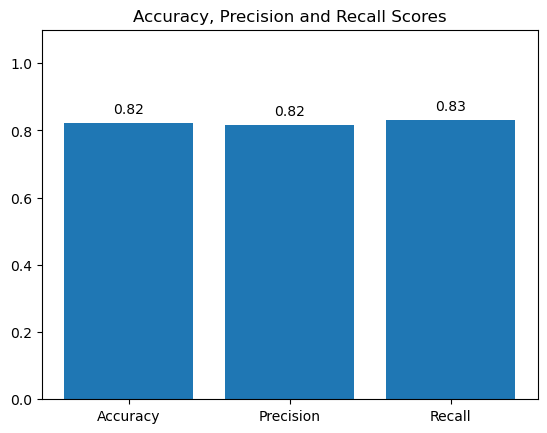

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score

accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)

metrics = ['Accuracy', 'Precision', 'Recall']
scores = [accuracy, precision, recall]


plt.bar(metrics, scores)

for i, score in enumerate(scores):
    plt.text(i, score+0.02, f'{score:.2f}', ha='center', va='bottom', fontsize = 10)
    
plt.ylim(0,1.1)
plt.title('Accuracy, Precision and Recall Scores')
plt.show()

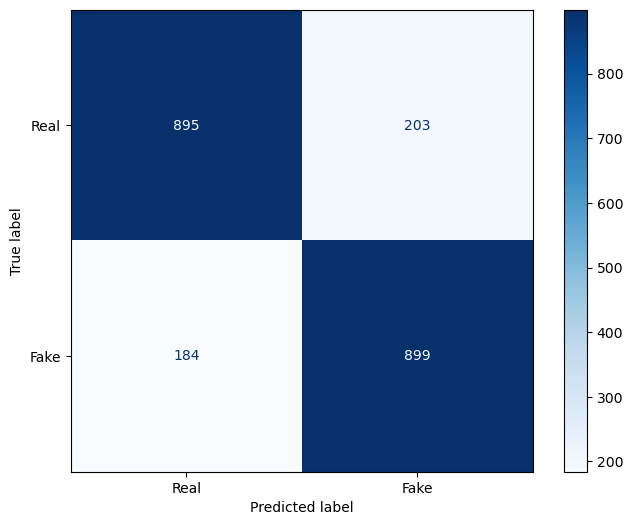

In [44]:
conf = confusion_matrix(true_labels, predicted_labels)
labels = ['Real', 'Fake']

conf_mat = ConfusionMatrixDisplay(conf, display_labels=labels)

fig, ax = plt.subplots(figsize=(8, 6))
conf_mat.plot(ax=ax, cmap=plt.cm.Blues, values_format='.0f') 
plt.show()

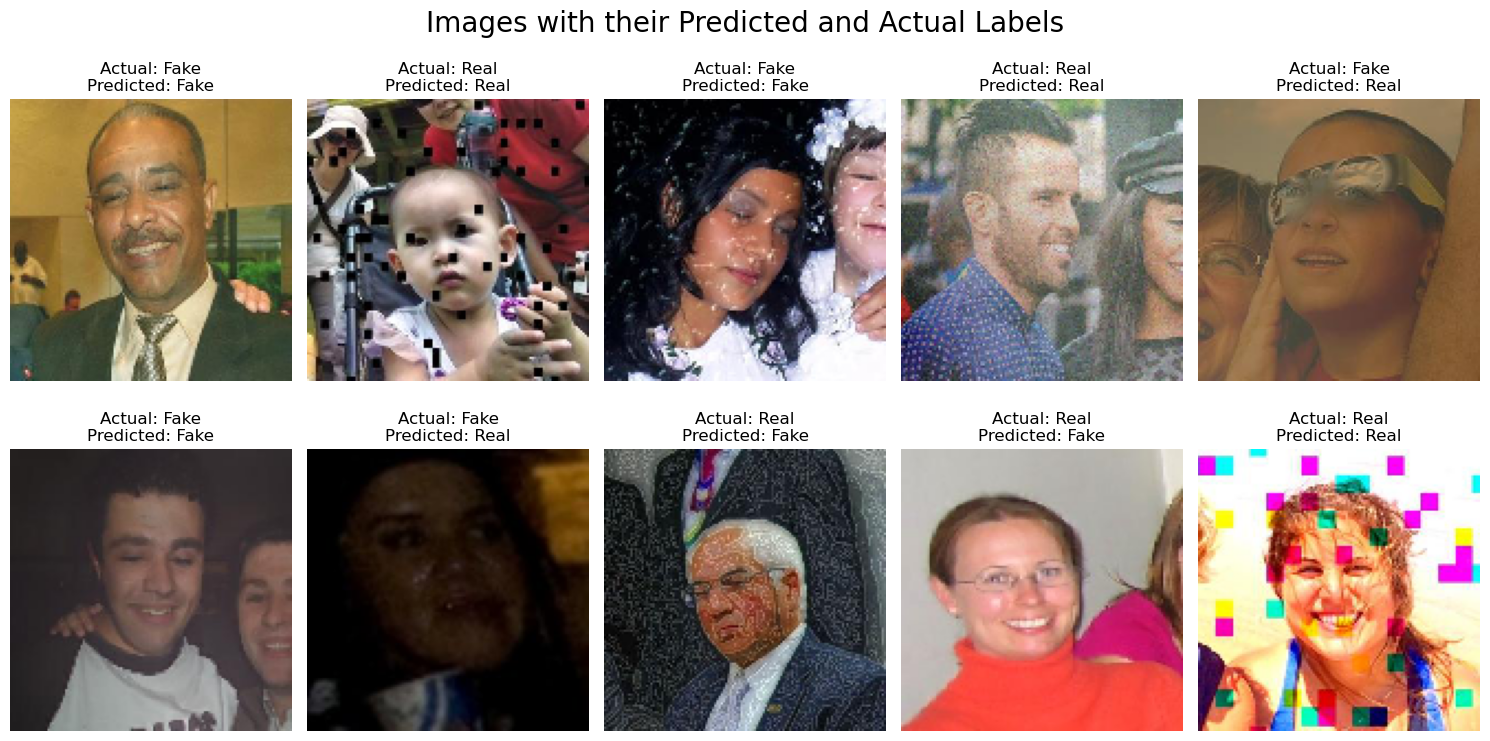

In [63]:
indices = np.random.choice(len(X_test), 10)

disp_img = X_test[indices]
disp_img_lab = y_test[indices]

fig, axes = plt.subplots(nrows=2, ncols = 5, figsize = (15,8))
fig.suptitle('Images with their Predicted and Actual Labels', fontsize=20)

for i, ax in enumerate(axes.flat):
    ax.imshow(disp_img[i])
    ax.axis('off')
    
    actual_label = 'Real' if disp_img_lab[i] == 1 else 'Fake'
    predicted_label = 'Real' if predicted_labels[i] == 1 else 'Fake'
    ax.set_title('Actual: ' +actual_label +'\n' + 'Predicted: ' + predicted_label)
    
plt.tight_layout()
plt.show()

In [67]:
model2.save('deepfake_model4.h5')